# High-dimensional data visualization of the microstructural feature matrix build from the new ADNI3 dataset

## First let’s get all libraries in place.

In [1]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

import nibabel as nib

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

## Load the feature matrix

In [26]:
# Load output_matrix1 (roi blocks) / output_matrix2 (feature blocks)
matrix_filename = './data/output_matrix1.csv'
feat_matrix = np.loadtxt(matrix_filename, delimiter=',')

# Create feature->integer mapping 
features_name = ['FA', 'rtop']
features_idx_mapping = {}
features_idx = np.zeros(len(features_name))
print(features_idx.shape)
for k, feat in enumerate(features_name):
    features_idx_mapping[feat] = k
    features_idx[k] = k
    
print('Feature<->idx mapping : {}'.format(features_idx_mapping))
print('Feature keys : {}'.format(features_idx_mapping.keys()))
print('Feature idx : {}'.format(features_idx))

#Should get number of voxels inside mask (hard-coded for the moment)
number_of_voxels = 150000

number_of_features = len(features_idx_mapping.keys())
print('Number of features : {}'.format(number_of_features))

# Create a random feature matrix for testing before having access to the real one once we have it
feat_matrix = np.random.rand(102,number_of_voxels*number_of_features)
print('Feature matrix shape : {}'.format(feat_matrix.shape))

# Proper classification of the 102 subjects (Healthy control: True / Patient: False)
c = np.array([False,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True, False,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True,  True, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

#Convert boolean(False/True)->integerclassification 
class_target = np.zeros(c.shape)
class_target[c==True] = 1
class_target[c==False] = 0
print('Classification target : {}'.format(class_target))
print('Classification target shape : {}'.format(class_target.shape))


(2,)
Feature<->idx mapping : {'FA': 0, 'rtop': 1}
Feature keys : dict_keys(['FA', 'rtop'])
Feature idx : [0. 1.]
Number of features : 2
Feature matrix shape : (102, 300000)
Classification target : [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Classification target shape : (102,)


## Convert the matrix and vector to a Pandas DataFrame

In [27]:

# Prepare voxel_idx (ROI blocks)
voxel_idx_roi_blocks = np.kron(np.arange(1,number_of_voxels+1,1), np.ones(number_of_features)).astype(int)
features_idx_roi_blocks = np.tile(features_idx,number_of_voxels)

print('voxel_idx_roi_blocks shape: {}'.format(voxel_idx_roi_blocks.shape))
print('features_idx_roi_blocks shape: {}'.format(features_idx_roi_blocks.shape))

df = pd.DataFrame(feat_matrix)
df['y'] = class_target
#df['voxel_idx'] = voxel_idx_roi_blocks
#df['features_idx'] = features_idx_roi_blocks
df

voxel_idx_roi_blocks shape: (300000,)
features_idx_roi_blocks shape: (300000,)


,0,1,2,3,4,5,6,7,8,9,...,299991,299992,299993,299994,299995,299996,299997,299998,299999,y
0,0.662718,0.587940,0.831529,0.491131,0.748197,0.677196,0.696896,0.206329,0.058287,0.782434,...,0.687530,0.403974,0.256403,0.758221,0.108339,0.615602,0.865049,0.302777,0.907042,0.0
1,0.244886,0.051787,0.555276,0.232274,0.361417,0.608408,0.958267,0.785766,0.312608,0.968142,...,0.281813,0.669869,0.791504,0.362730,0.806923,0.154077,0.257946,0.183807,0.812460,1.0
2,0.825802,0.409105,0.117548,0.568966,0.690753,0.215914,0.733174,0.848888,0.622085,0.090437,...,0.678058,0.480214,0.256193,0.310108,0.208977,0.784905,0.646549,0.519901,0.126936,0.0
3,0.431681,0.128675,0.043718,0.559422,0.271372,0.079752,0.025185,0.815334,0.157894,0.683200,...,0.085060,0.153988,0.322213,0.992288,0.585842,0.760753,0.307743,0.172424,0.039100,0.0
4,0.804101,0.197757,0.571097,0.611049,0.483001,0.488314,0.145226,0.462403,0.070701,0.891606,...,0.523773,0.813330,0.802856,0.539456,0.631067,0.607992,0.964663,0.728433,0.505856,0.0
5,0.626360,0.820104,0.159455,0.998538,0.658164,0.572363,0.837876,0.796476,0.211577,0.083360,...,0.640032,0.996068,0.704013,0.232667,0.716515,0.748345,0.001680,0.080248,0.353931,0.0
6,0.408862,0.018799,0.591540,0.567790,0.642455,0.893432,0.331013,0.642086,0.001083,0.785026,...,0.131216,0.249370,0.885823,0.440885,0.757549,0.240313,0.286893,0.601024,0.022381,1.0
7,0.329426,0.401830,0.928403,0.792762,0.737905,0.854184,0.177967,0.621700,0.920137,0.700349,...,0.679043,0.423719,0.953583,0.540255,0.288631,0.281101,0.283736,0.877381,0.340703,1.0
8,0.944005,0.340689,0.817495,0.634545,0.506924,0.916019,0.167072,0.755034,0.221858,0.762366,...,0.541183,0.588456,0.748621,0.363122,0.661409,0.690117,0.170556,0.874819,0.461222,1.0
9,0.642170,0.144011,0.600536,0.545763,0.259638,0.072977,0.149999,0.613505,0.613527,0.409409,...,0.116638,0.888696,0.228010,0.367839,0.954687,0.317432,0.762978,0.690930,0.449774,1.0


##  Run PCA to reduce the number of dimensions to a reasonable amount

Explained variation per principal component: [0.0449036  0.04488849 0.04470061]


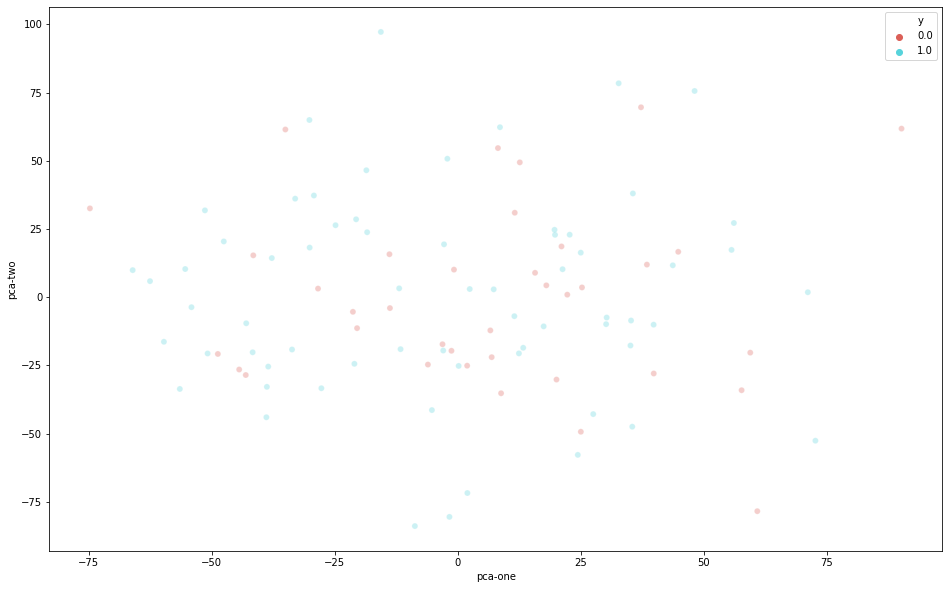

In [35]:
data = df.values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3,
)

### Create a new dataset containing the fifty dimensions generated by the PCA reduction algorithm

In [36]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data)

print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.5634233518398305


### Inject the new fifty dimension generated by PCA to t-SNE

In [31]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 0.21639227867126465 seconds


In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

### Visualization

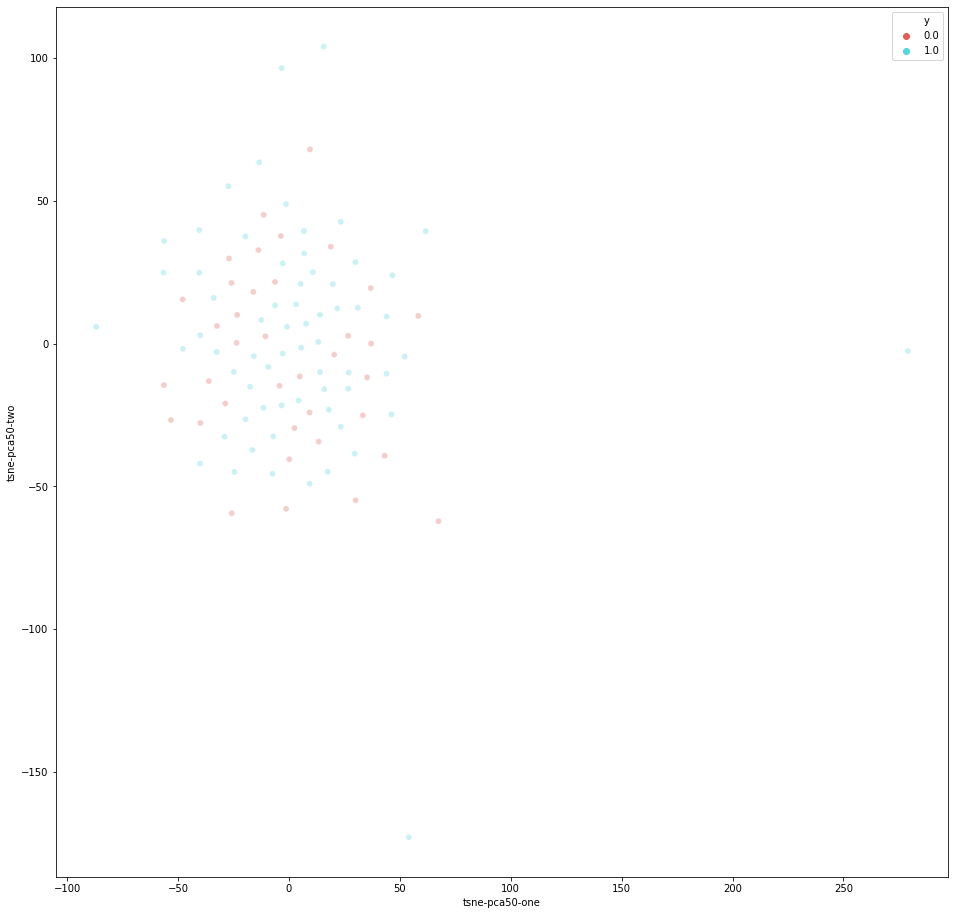

In [40]:
df['tsne-pca50-one'] = tsne_pca_results[:,0]
df['tsne-pca50-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,16))

ax1 = plt.subplot(1, 1, 1)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="y",
    palette=sns.color_palette("hls", 2),
    data=df,
    legend="full",
    alpha=0.3,
    ax=ax1
)